# Loan Application Status Prediction

## Problem Statement :-
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


## Objective
We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
import joblib as jl
from joblib import dump,load
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Now all the necessary libraries has been imported now we'll import our dataset
df=pd.read_csv(r"C:\Users\hp\Dropbox\PC\Desktop\Evaluation Projects\week 2\Loan application status prediction\loan_prediction.csv")

In [50]:
# Now lets see how our dataset looks and what are the diffrent feature and lable does it contain

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Features in our Dataset are:

Loan_ID : Unique Identification of every person's loan account.

Gender : Male or Female

Dependents : No. of Dependents

Education : Graduate or Non-Graduate

Self_Employed : Weather a person is Self Employed or Salaried

ApplicantIncome : Person's own Income.

CoapplicantIncome: Income of Coapplicant

LoanAmount: Total amount applicant owe to the bank.

Loan_Amount_Term : Tenure of Loan Amount in 'Months'

Credit_History : Previous Loan History

Property_Area : Urban,Rural,Semiurban


## Target in our dataset:

Loan_Status : Yes or No.Weather Loan is approved or not.

## EDA

In [51]:
# lets check the shape 
df.shape

(614, 13)

In [52]:
# Lets check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
# Checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [54]:
for i in df.columns:
    print(i,':' , len(df[i].unique()))

Loan_ID : 614
Gender : 3
Married : 3
Dependents : 5
Education : 2
Self_Employed : 3
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 204
Loan_Amount_Term : 11
Credit_History : 3
Property_Area : 3
Loan_Status : 2


### Treating Null values

In [55]:
#Replacing null values of object column with mode of it.

collist=df.columns.values
for i in range(0,len(collist)):
    if df[collist[i]].dtype == "object":
        df[collist[i]].fillna(df[collist[i]].mode()[0], inplace=True)
        
        
#Replacing non object values i.e. int64 and float64 null values with mean of it.

collist=df.columns.values
for i in range(0,len(collist)):
    if df[collist[i]].dtype != "object":
        df[collist[i]].fillna(df[collist[i]].mean(), inplace=True)


In [56]:
# Now let check does it still contain null values

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Data Visualization

Loan_Status
Y    422
N    192
dtype: int64


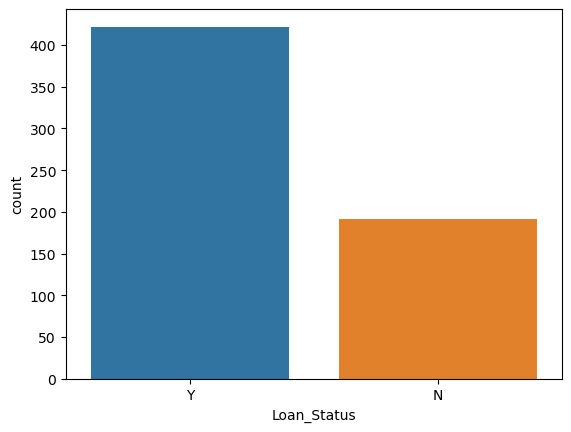

In [57]:
sns.countplot('Loan_Status',data=df)
print(df.value_counts('Loan_Status'))

#### As we can see from above graph that count of rejected loan is less than accepted loan but it dose'nt seems to be an imbalance data, Hence there is no need for balancing the data.

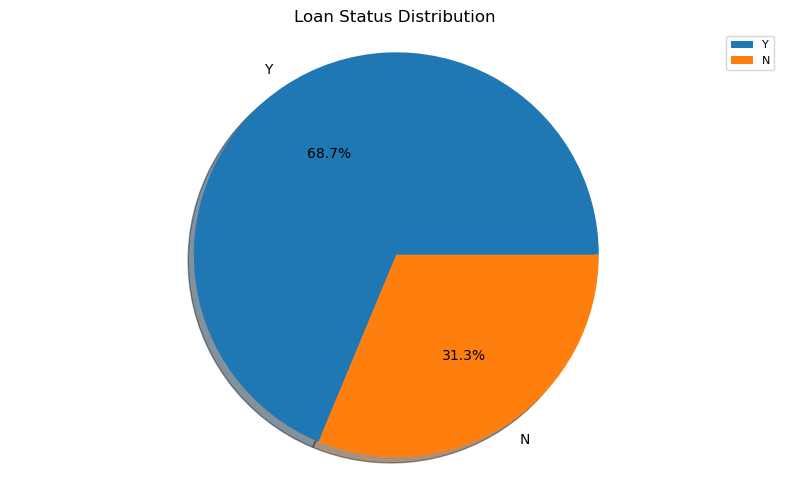

In [58]:
plt.figure(figsize=(8,5))
plt.style.use('default')
plt.pie(df['Loan_Status'].value_counts(),labels=df['Loan_Status'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.legend()
plt.legend(prop={'size':8})
plt.axis('equal')
plt.tight_layout()
plt.show()

Gender
Male      502
Female    112
dtype: int64


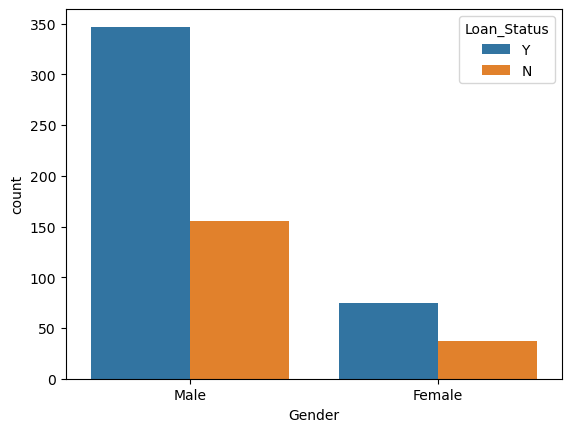

In [59]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')
print(df.value_counts('Gender'))

Married
Yes    401
No     213
dtype: int64


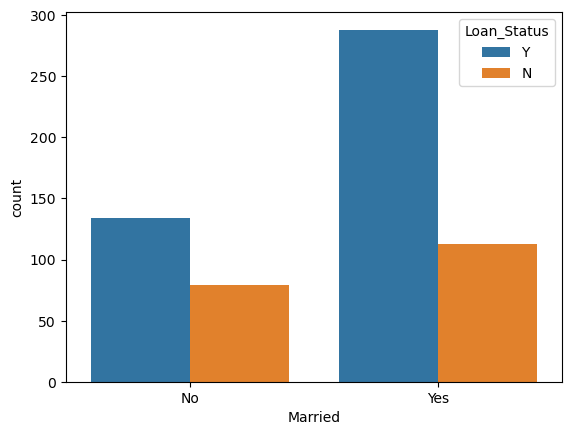

In [60]:
sns.countplot(x='Married',data=df,hue='Loan_Status')
print(df.value_counts('Married'))

Dependents
0     360
1     102
2     101
3+     51
dtype: int64


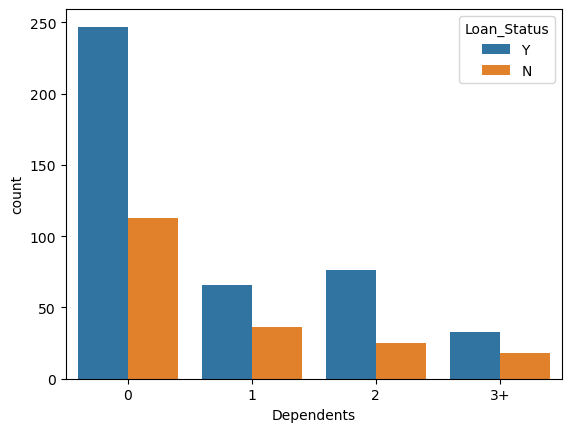

In [61]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')
print(df.value_counts('Dependents'))

Education
Graduate        480
Not Graduate    134
dtype: int64


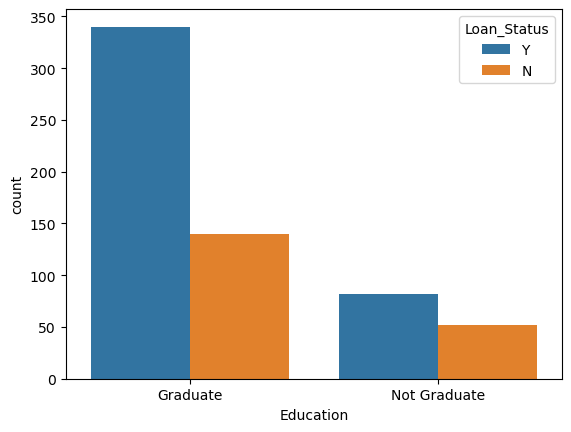

In [62]:
sns.countplot(x='Education',data=df,hue='Loan_Status')
print(df.value_counts('Education'))

Self_Employed
No     532
Yes     82
dtype: int64


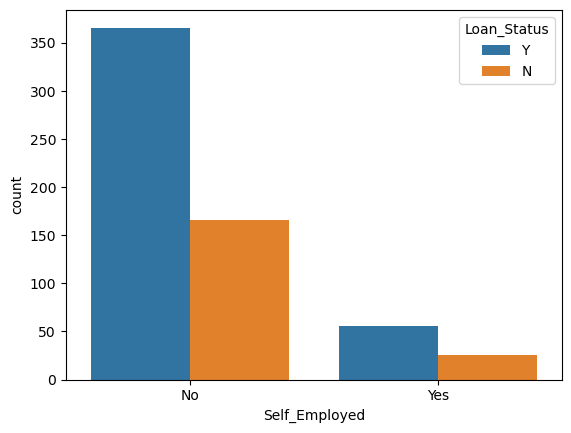

In [63]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')
print(df.value_counts('Self_Employed'))

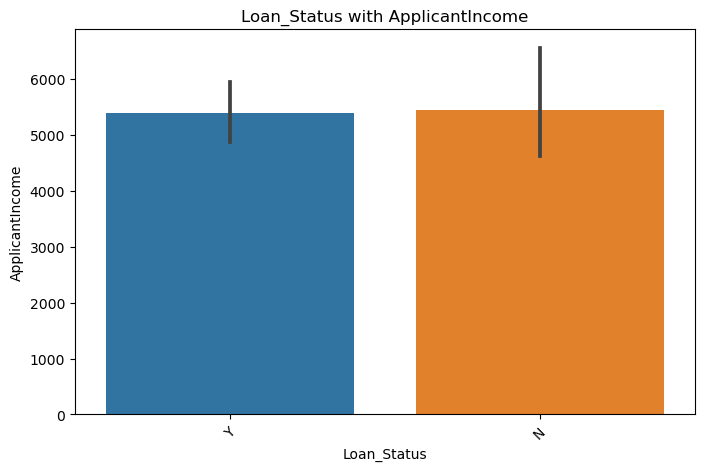

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.xticks(rotation=45)
plt.show()

Chances for acceptance and rejection are equal

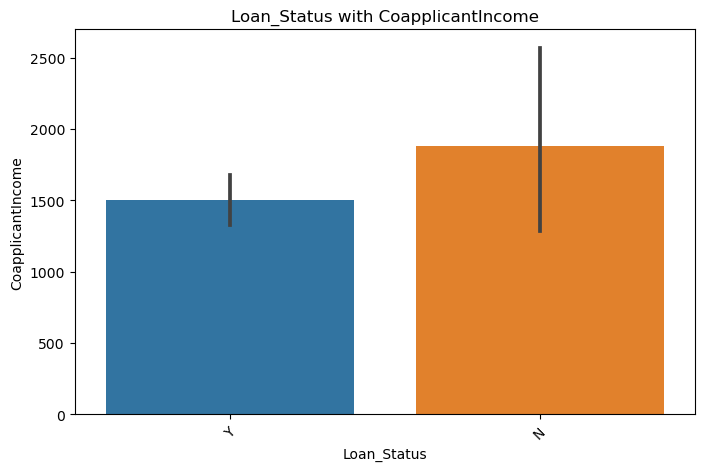

In [65]:
plt.figure(figsize=(8,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.xticks(rotation=45)
plt.show()

Credit_History
1.000000    475
0.000000     89
0.842199     50
dtype: int64


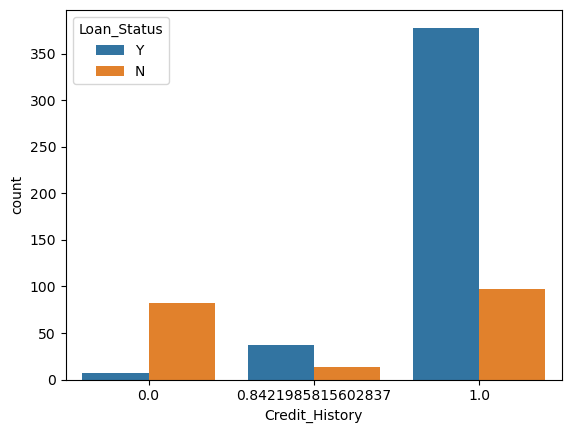

In [66]:
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')
print(df.value_counts('Credit_History'))

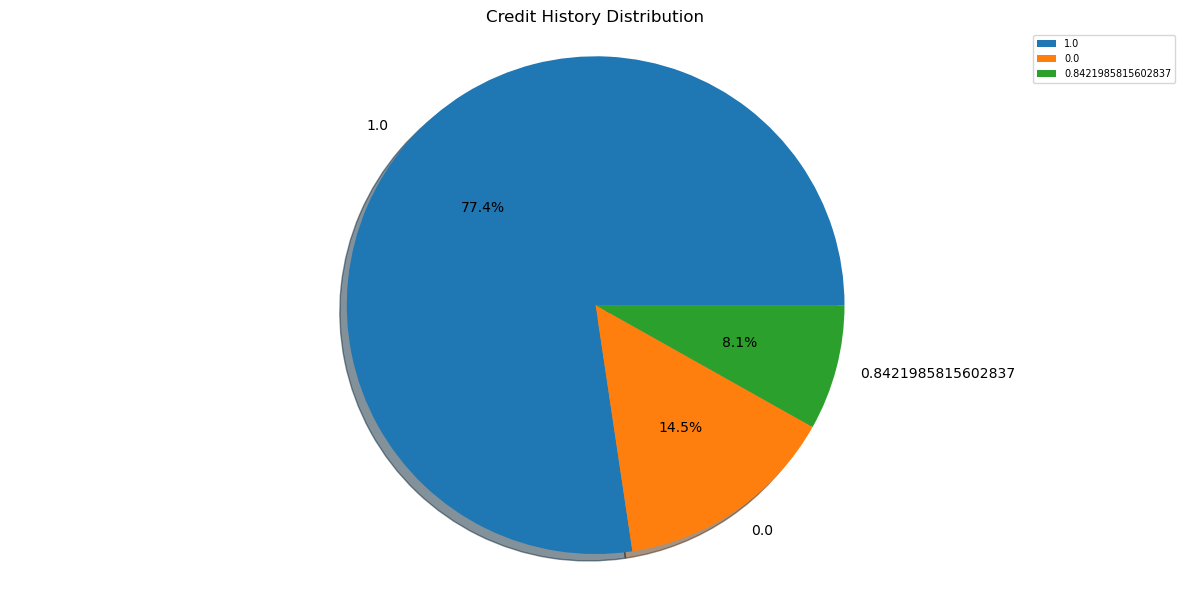

In [67]:
plt.figure(figsize=(12,6))
plt.style.use('default')
plt.pie(df['Credit_History'].value_counts(),labels=df['Credit_History'].value_counts().index,shadow=True,autopct='%1.1f%%')
plt.title('Credit History Distribution')
plt.legend()
plt.legend(prop={'size':7})
plt.axis('equal')
plt.tight_layout()
plt.show()

Property_Area
Semiurban    233
Urban        202
Rural        179
dtype: int64


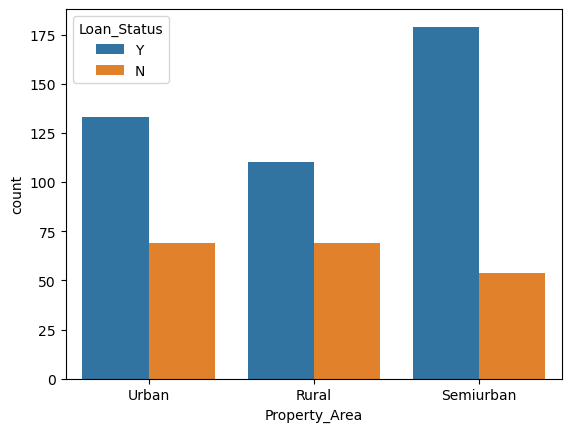

In [68]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
print(df.value_counts('Property_Area'))

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
dtype: int64


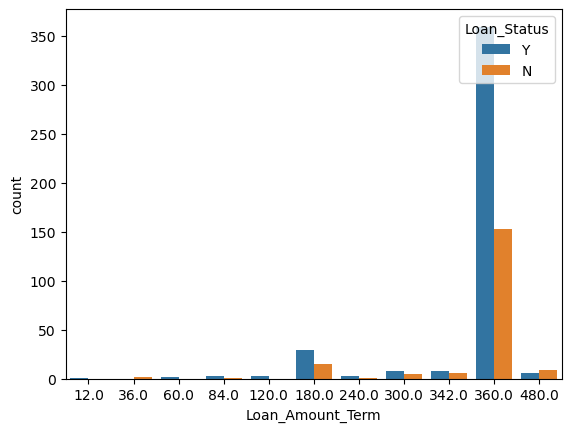

In [69]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)
print(df.value_counts('Loan_Amount_Term'))

## Feature Engineering

In [70]:
# First of all we'll drop column['Loan_ID'], since its of no significance.
df=df.drop(columns=['Loan_ID'],axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [71]:
# we can see 'Loan_Id' has been droped from our dataset as its of no use 
# Now lets encode object type dataset into integer using some encoding technique
#Encoding object data into integer using Label Encoder

label_col = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[label_col]=df[label_col].apply(lambda x : label.fit_transform(x))


In [72]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [73]:
df.value_counts('Gender')

Gender
1    502
0    112
dtype: int64

In [74]:
df.value_counts('Education')

Education
0    480
1    134
dtype: int64

In [75]:
df.value_counts('Married')

Married
1    401
0    213
dtype: int64

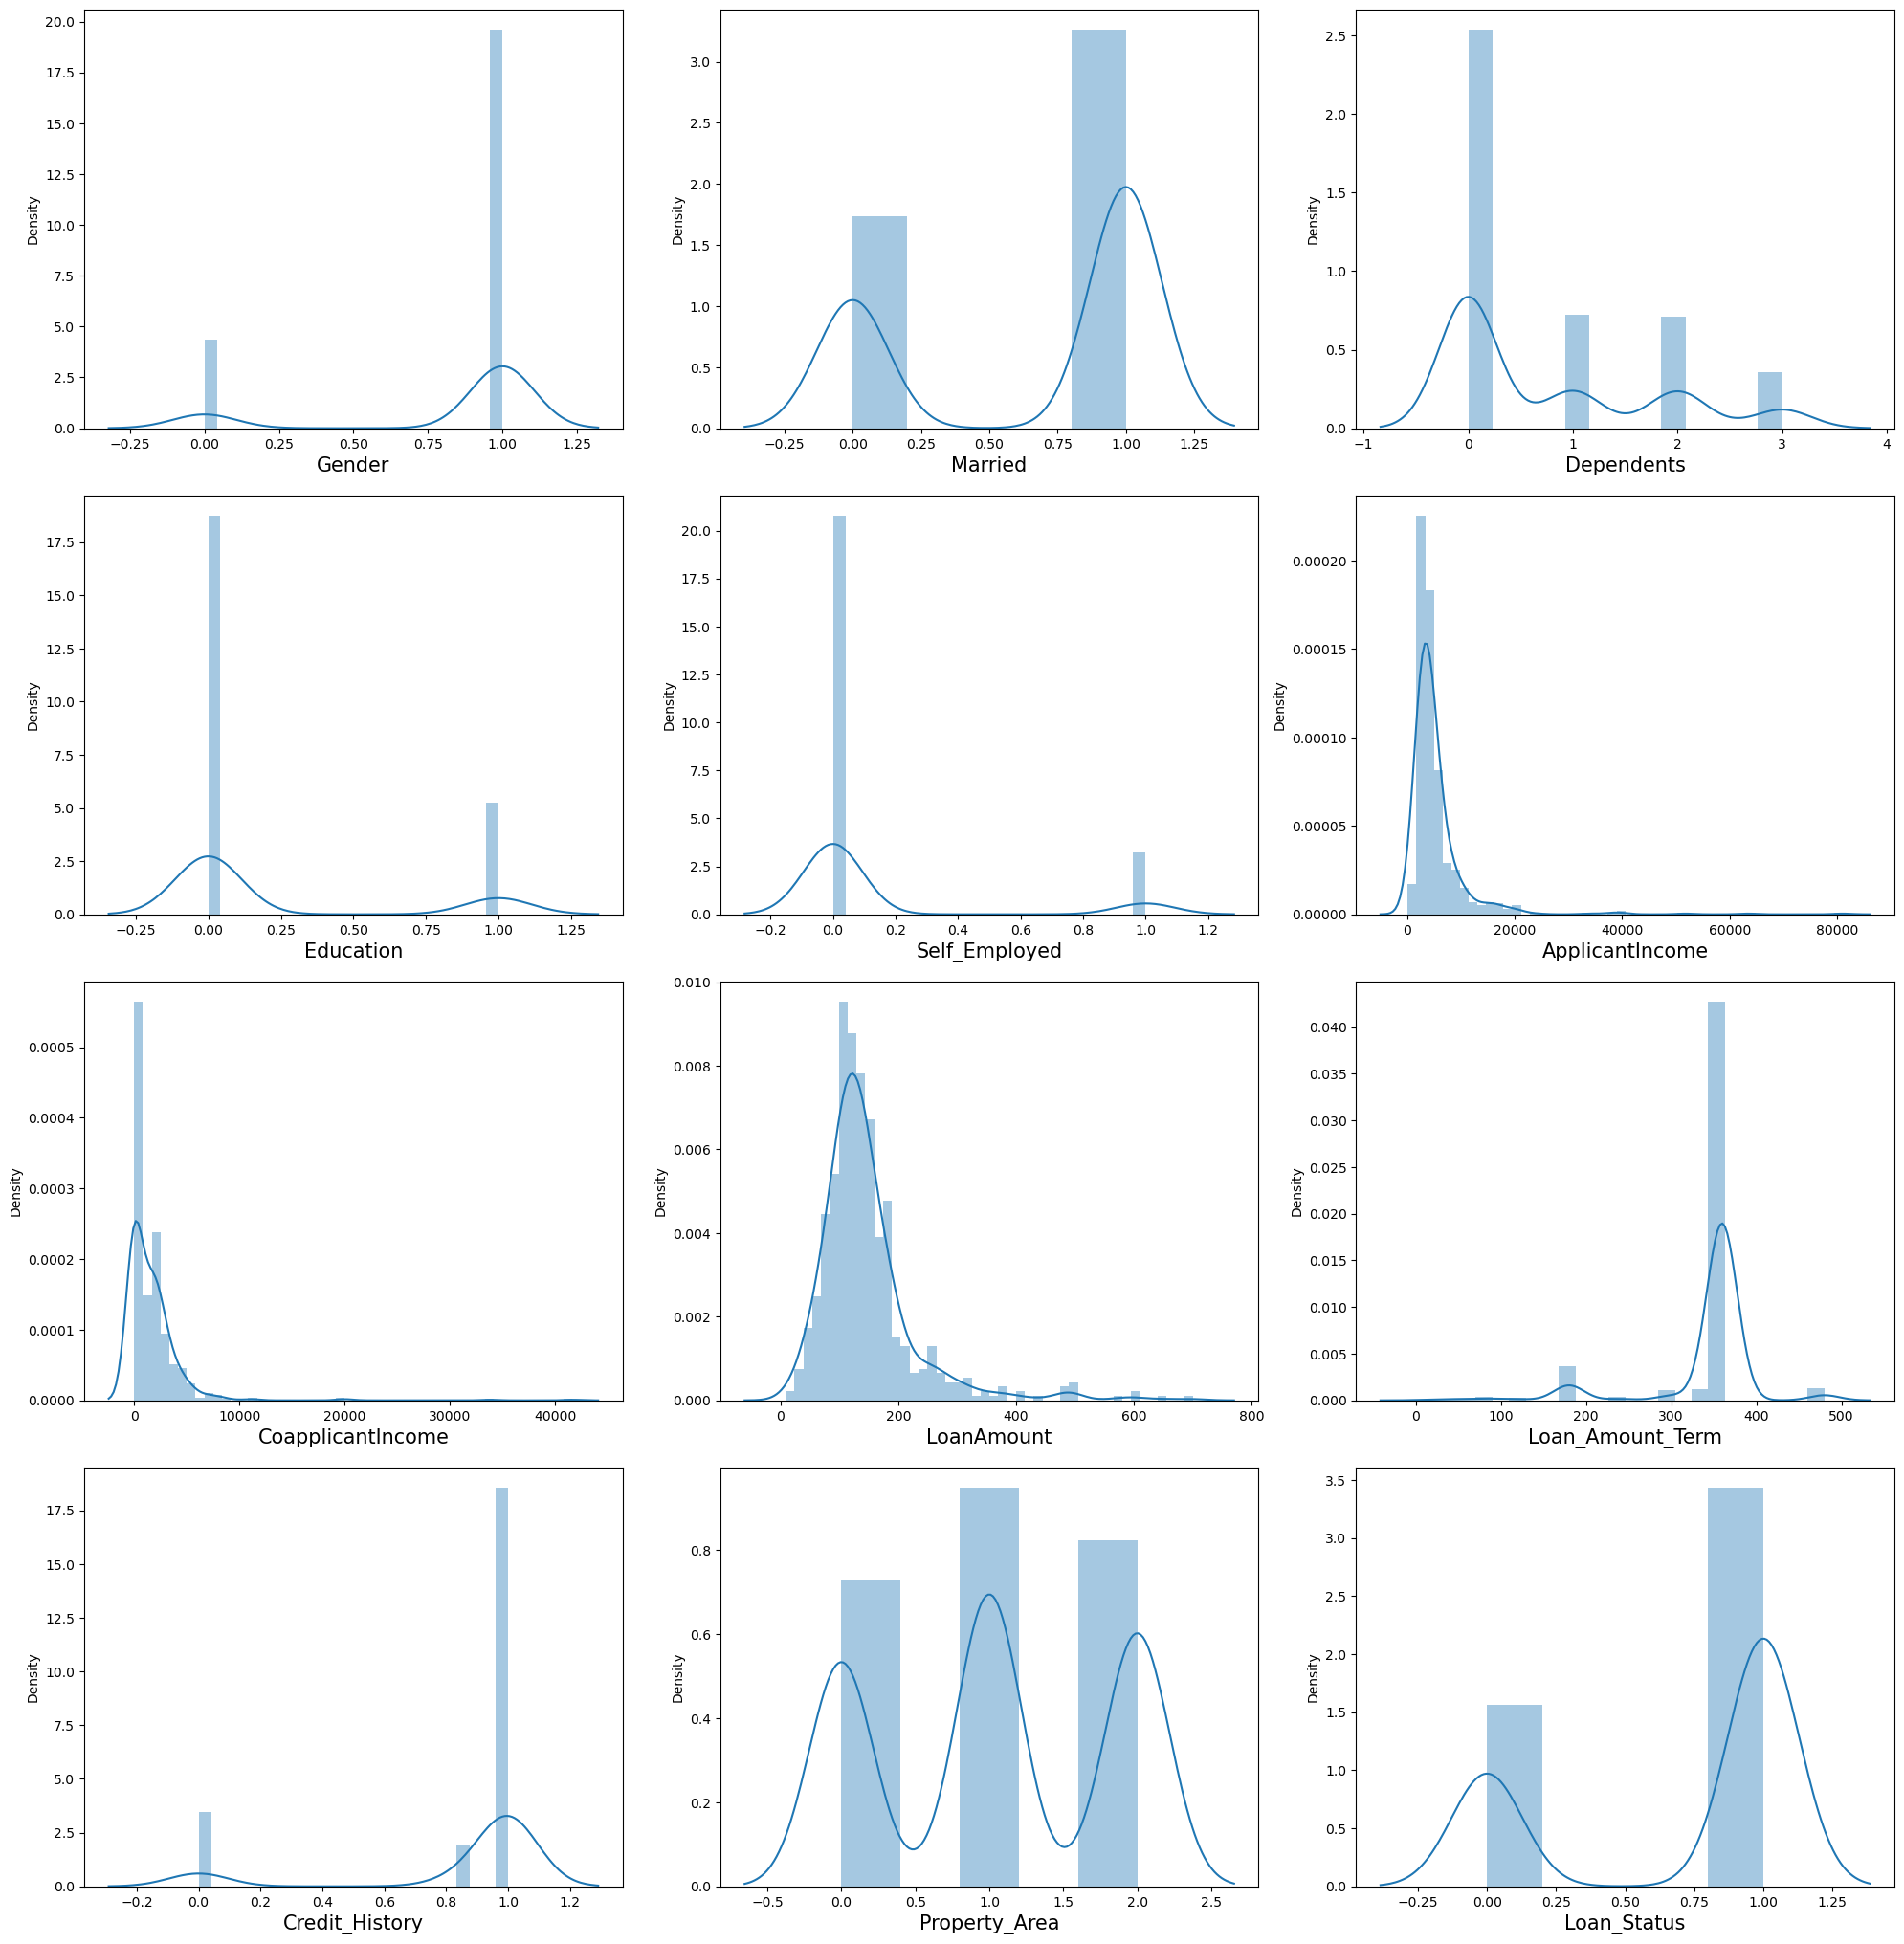

In [76]:
# As we can already see that all the data has been encoded now we can see the distribution of data

# Checking Data Distribution

plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=15 : 
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

#### Skewness handling

In [77]:
# lets check for skewness in data
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [78]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

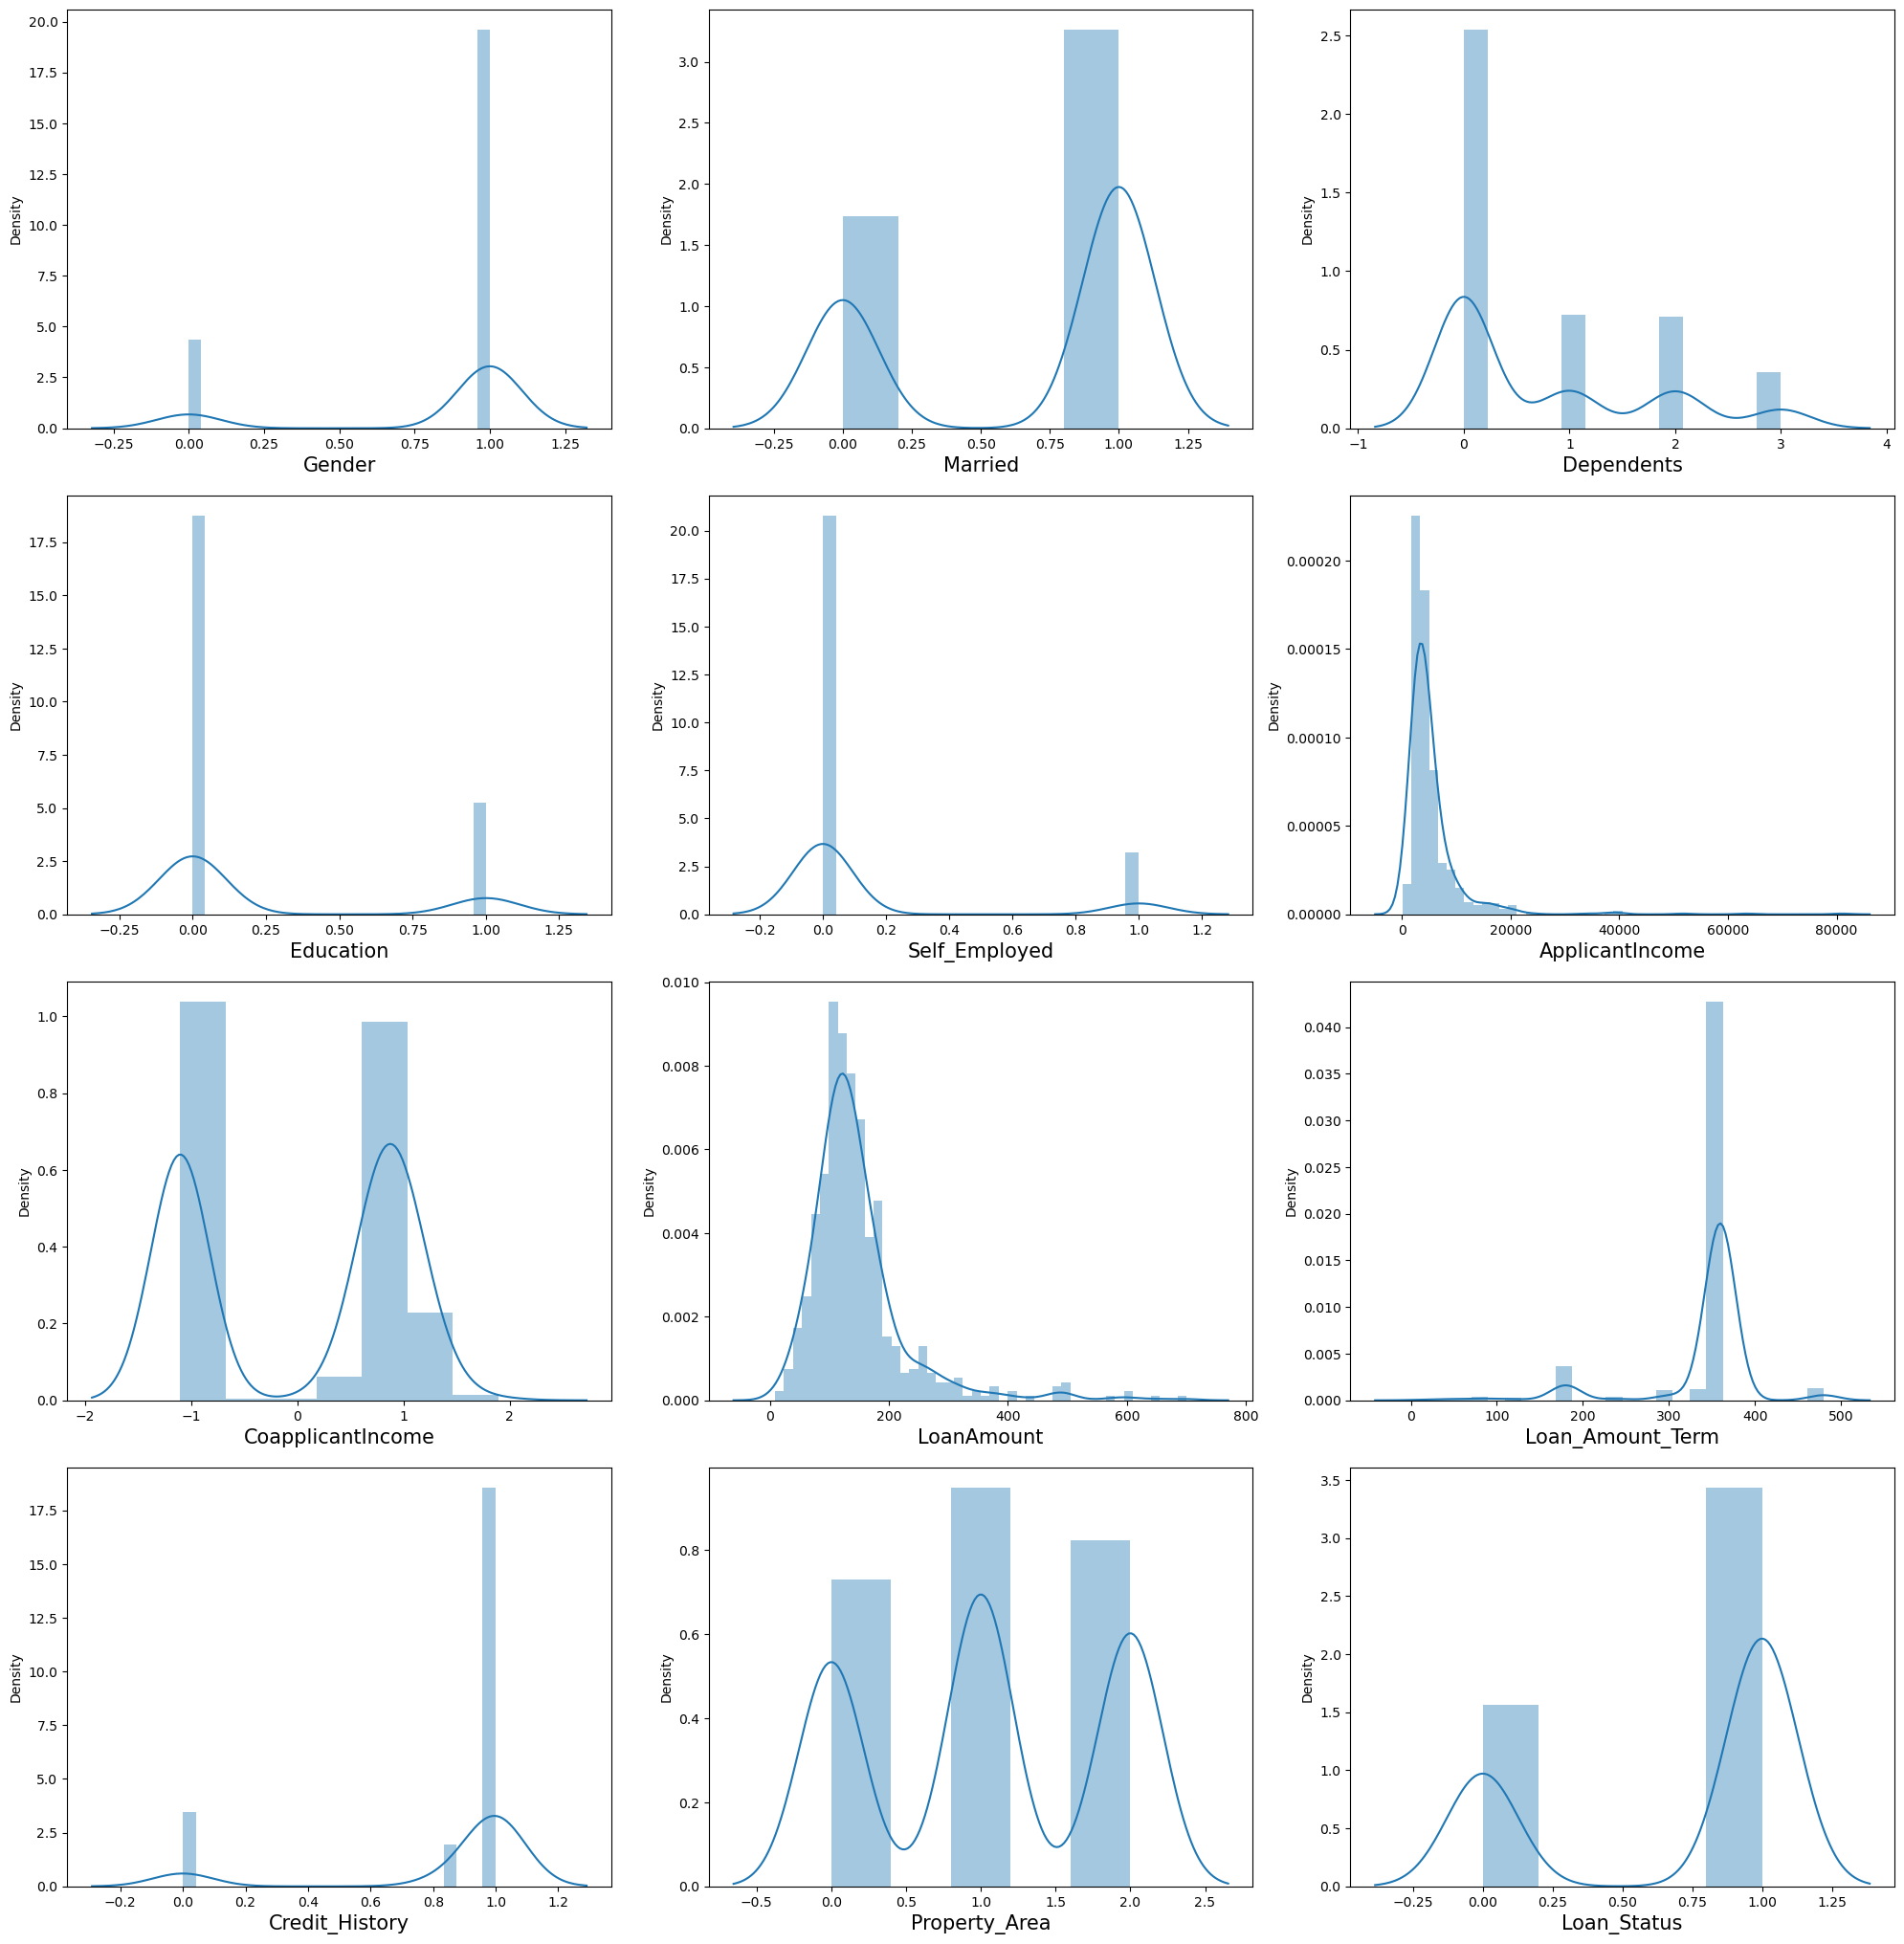

In [79]:

# Checking Data Distribution

plt.figure(figsize=(20,25))

plotnumber=1

for column in df:
    if plotnumber<=15 : 
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column , fontsize=15)
        
    plotnumber+=1
plt.tight_layout()

In [80]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome   -0.145646
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

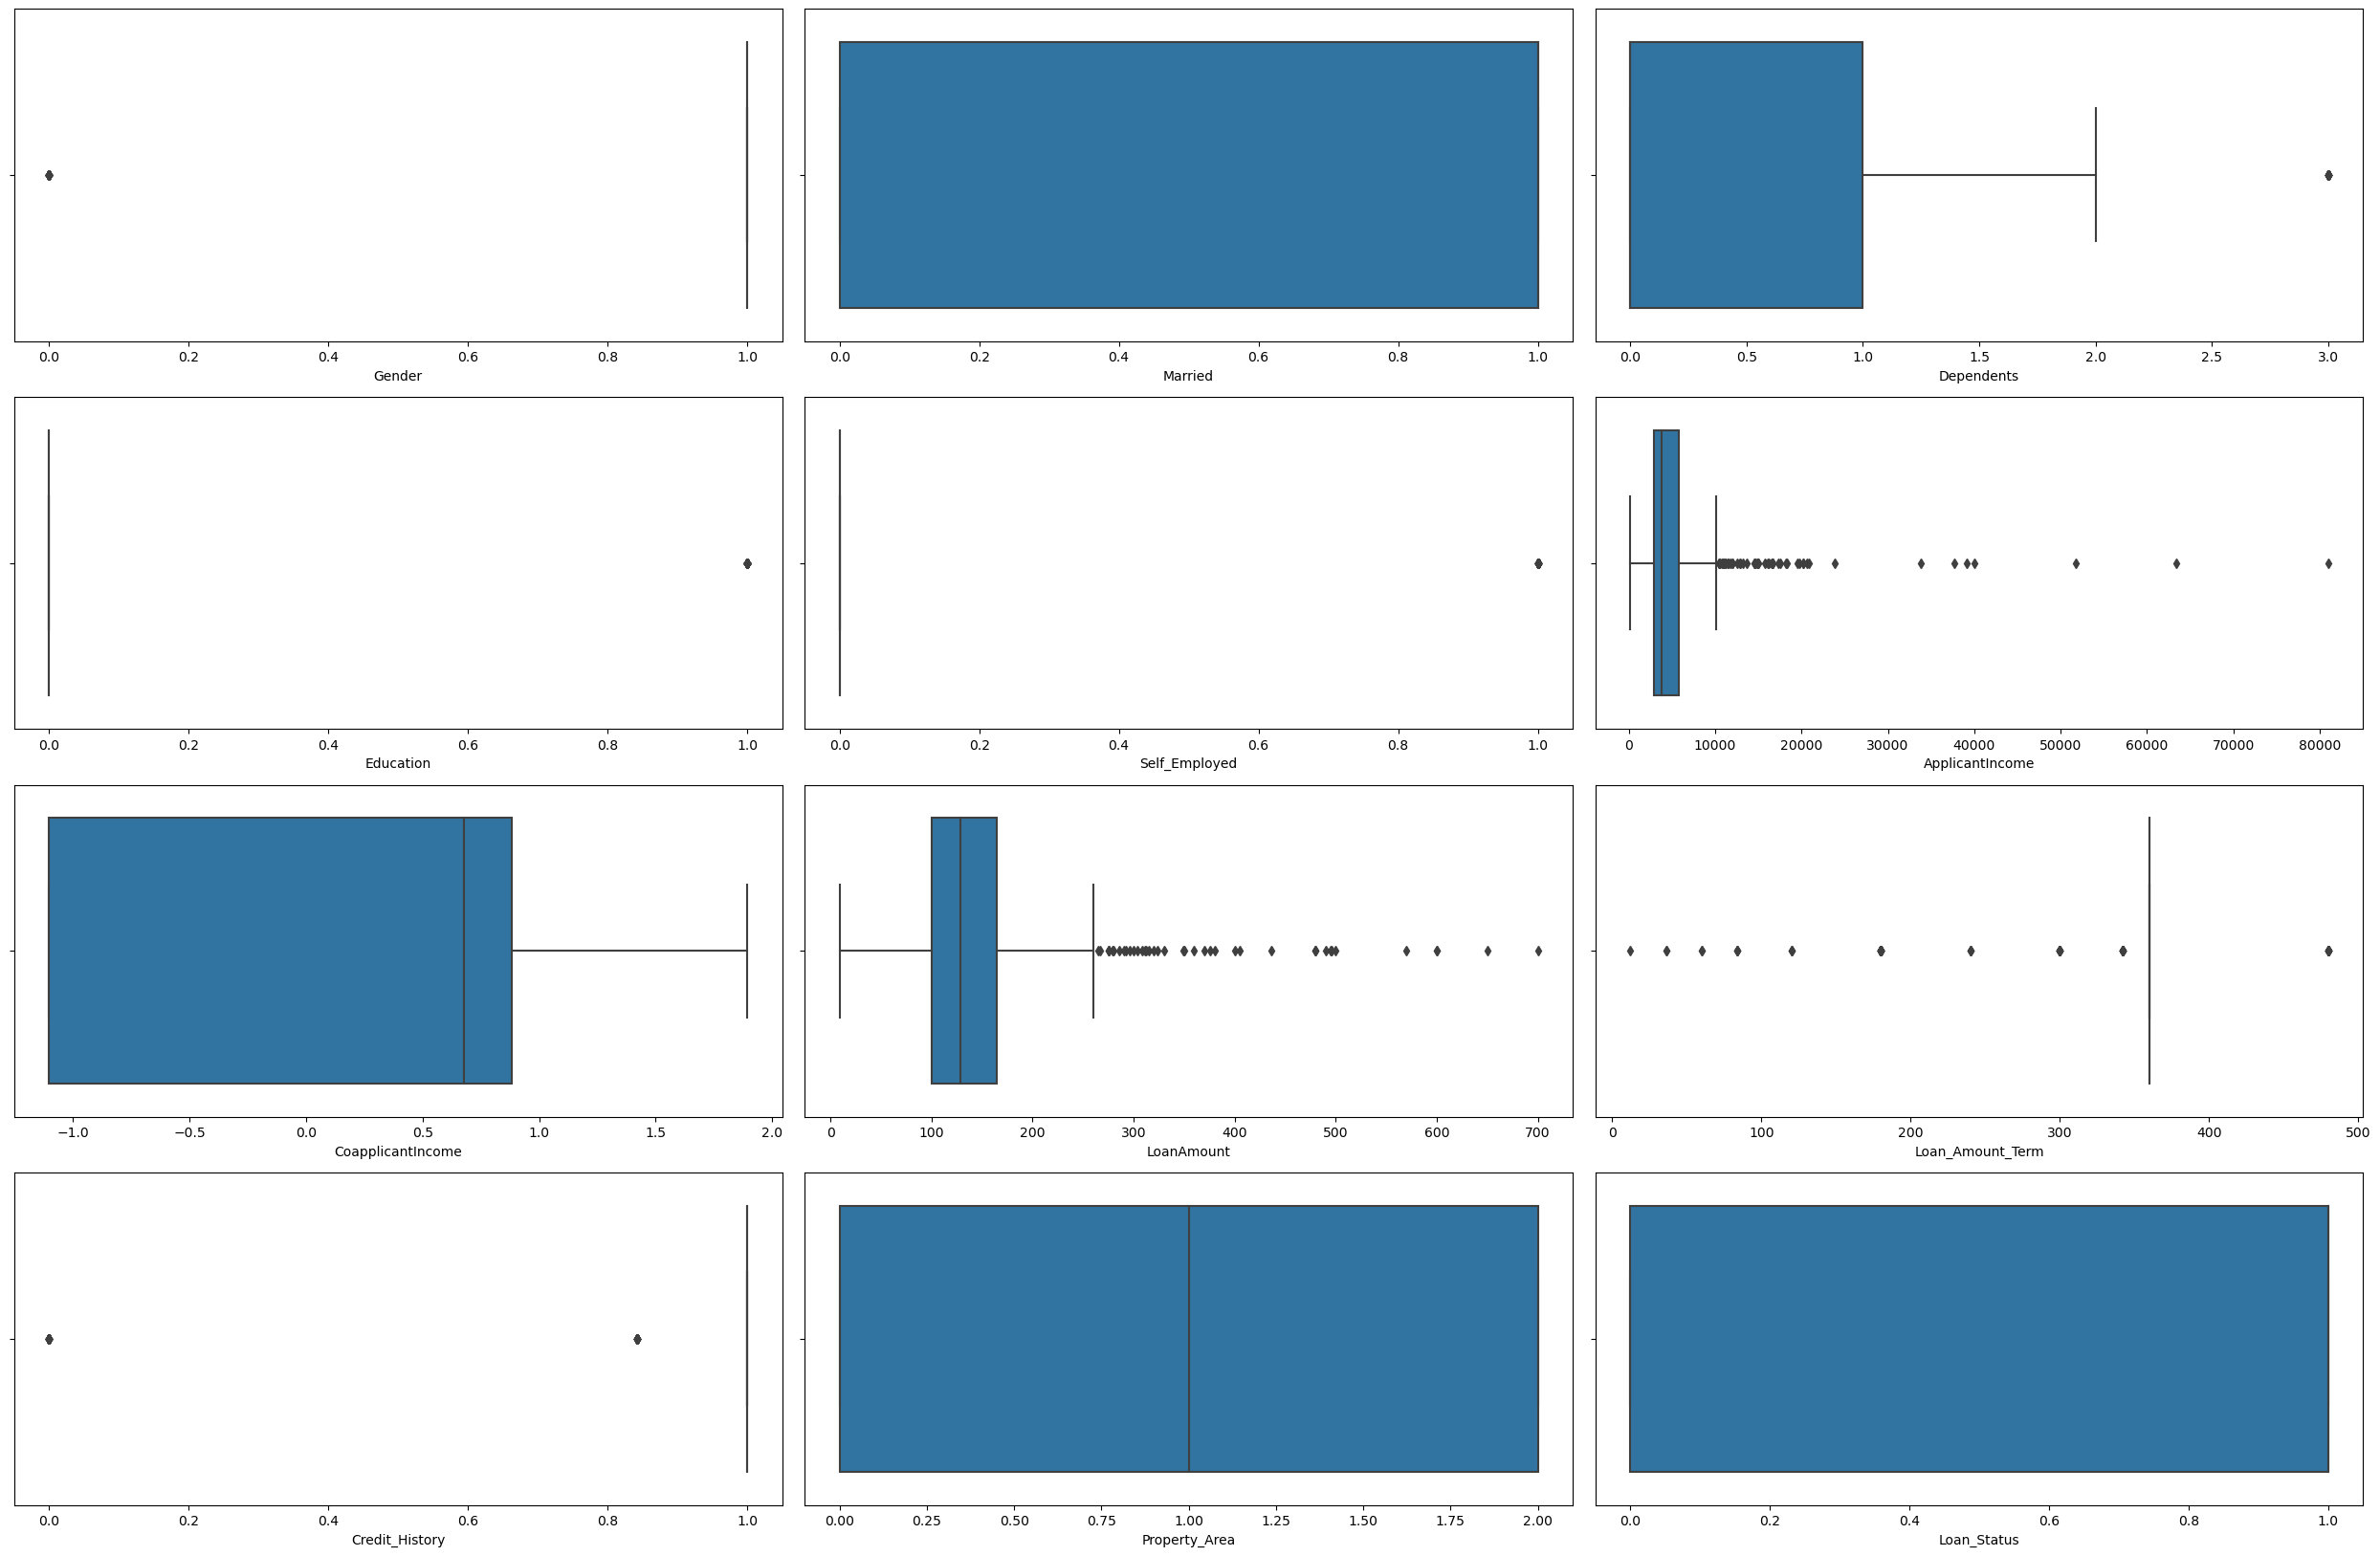

In [81]:
# checking if there is any kind of outlier presence in data or not using box plot

plt.figure(figsize=(25,20))
plotnumber=1
for column in df:
    if plotnumber<=15 : 
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(df[column])
        
    plotnumber+=1
plt.tight_layout()


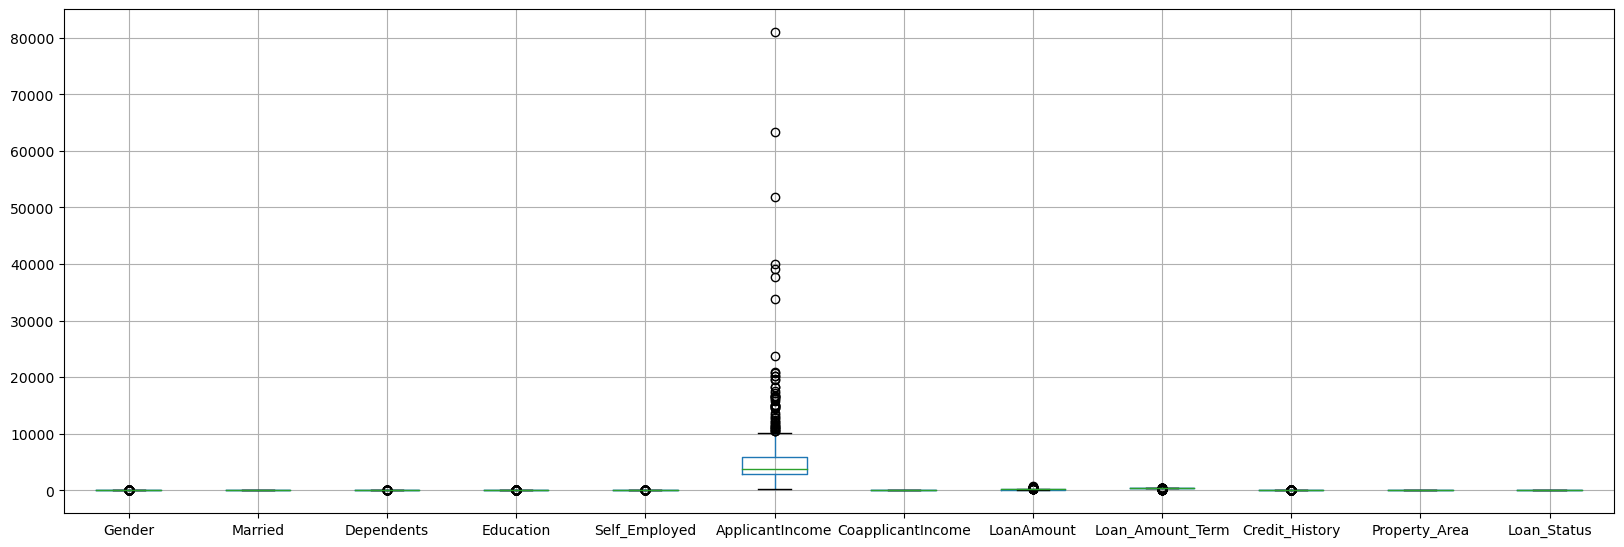

In [82]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

since it seem there are few outlier present in our dataset ,lets treat them before mooving further

#### Outlier treatment
(using  zscore method)

In [83]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([ 14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183, 185,
       242, 262, 278, 308, 313, 333, 333, 369, 409, 432, 443, 487, 495,
       497, 506, 523, 525, 546, 561, 575, 585, 604], dtype=int64), array([8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7, 7, 5,
       7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 8, 7], dtype=int64))


In [84]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (582, 12)


In [85]:
# as we can see there in very little lose of data i.e '12' rows we can proceed further
print(df_1.value_counts('Loan_Status'))

Loan_Status
1    399
0    183
dtype: int64


In [86]:
# assigning df
df=df_1

In [87]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,-1.102837,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,0.750578,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,-1.102837,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,0.891686,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,-1.102837,141.000000,360.0,1.0,2,1


### Seperating  Feature and Label

In [88]:
X=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [89]:
## scaling data
scalar=StandardScaler()
x_scaled=scalar.fit_transform(X)

In [90]:
#Splitting Data into Training and testing :

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.28,random_state=45)

In [92]:
#Importing Models

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score,f1_score,PrecisionRecallDisplay,plot_confusion_matrix,precision_score,recall_score

## Logistic Regression

In [93]:
rslt=[]

lr = LogisticRegression(C=10, fit_intercept=True, max_iter=1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', lr.score(x_train,y_train))
print('TESTING SCORE : ', lr.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8162291169451074
TESTING SCORE :  0.8159509202453987
ACCURACY : 0.8159509202453987
*****************************
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        51
           1       0.79      1.00      0.88       112

    accuracy                           0.82       163
   macro avg       0.89      0.71      0.73       163
weighted avg       0.85      0.82      0.79       163



## Random Forest

In [94]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc.score(x_train,y_train))
print('TESTING SCORE : ', rfc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.7975460122699386
ACCURACY : 0.7975460122699386
*****************************
              precision    recall  f1-score   support

           0       0.82      0.45      0.58        51
           1       0.79      0.96      0.87       112

    accuracy                           0.80       163
   macro avg       0.81      0.70      0.72       163
weighted avg       0.80      0.80      0.78       163



## Decision Tree Classifier

In [95]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', dt.score(x_train,y_train))
print('TESTING SCORE : ', dt.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  1.0
TESTING SCORE :  0.7607361963190185
ACCURACY : 0.7607361963190185
*****************************
              precision    recall  f1-score   support

           0       0.66      0.49      0.56        51
           1       0.79      0.88      0.84       112

    accuracy                           0.76       163
   macro avg       0.72      0.69      0.70       163
weighted avg       0.75      0.76      0.75       163



## GradientBoostingClassifier

In [96]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)

y_pred = gb.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', gb.score(x_train,y_train))
print('TESTING SCORE : ', gb.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.9236276849642004
TESTING SCORE :  0.7914110429447853
ACCURACY : 0.7914110429447853
*****************************
              precision    recall  f1-score   support

           0       0.81      0.43      0.56        51
           1       0.79      0.96      0.86       112

    accuracy                           0.79       163
   macro avg       0.80      0.69      0.71       163
weighted avg       0.80      0.79      0.77       163



## KNeighborsClassifier

In [97]:
kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', kn.score(x_train,y_train))
print('TESTING SCORE : ', kn.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8162291169451074
TESTING SCORE :  0.7668711656441718
ACCURACY : 0.7668711656441718
*****************************
              precision    recall  f1-score   support

           0       0.78      0.35      0.49        51
           1       0.76      0.96      0.85       112

    accuracy                           0.77       163
   macro avg       0.77      0.65      0.67       163
weighted avg       0.77      0.77      0.74       163



## SVC

In [98]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', svc.score(x_train,y_train))
print('TESTING SCORE : ', svc.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred))
rslt.append(acc)

TRAINING SCORE :  0.8233890214797136
TESTING SCORE :  0.8098159509202454
ACCURACY : 0.8098159509202454
*****************************
              precision    recall  f1-score   support

           0       0.95      0.41      0.58        51
           1       0.79      0.99      0.88       112

    accuracy                           0.81       163
   macro avg       0.87      0.70      0.73       163
weighted avg       0.84      0.81      0.78       163



In [99]:
#Creating DataFrame and storing all models result

result_df = pd.DataFrame({"ML Models":["Logistic Regression","Random Forest",
             "Decision Tree","Gradient Boosting","KNN","SVC"],"Score":rslt})
result_df

,ML Models,Score
0,Logistic Regression,0.815951
1,Random Forest,0.797546
2,Decision Tree,0.760736
3,Gradient Boosting,0.791411
4,KNN,0.766871
5,SVC,0.809816


In [100]:
# Here it looks like logistic regression works good with this model
#CROSS VALIDATION SCORE

mean_cv=[]
accuracy=[]
std=[]
classifiers=['Logistic Regression','Random Forest','Decision Tree','Gradientboost','KNN','SVC']
models=[LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),DecisionTreeClassifier(),
        GradientBoostingClassifier(),KNeighborsClassifier(n_neighbors=9),SVC()]
for i in models:
    
    model = i
    cv_result = cross_val_score(model,x_train,y_train,scoring = "accuracy",cv=3)
    
    mean_cv.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    print(i)
models_df=pd.DataFrame({'CV Mean':mean_cv,'Std':std},index=classifiers)       
models_df

LogisticRegression(max_iter=1000)
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
KNeighborsClassifier(n_neighbors=9)
SVC()


,CV Mean,Std
Logistic Regression,0.806612,0.027298
Random Forest,0.782785,0.009645
Decision Tree,0.739774,0.030158
Gradientboost,0.780353,0.034722
KNN,0.785149,0.016216
SVC,0.809010,0.024790


In [102]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve


In [103]:
print('ROC_AUC_SCORE_LOGISTIC_REGRESSION :',roc_auc_score(y_test,lr.predict(x_test)))
print('ROC_AUC_SCORE_RANDOM_FOREST :',roc_auc_score(y_test,rfc.predict(x_test)))
print('ROC_AUC_SCORE_DECISION_TREE :',roc_auc_score(y_test,dt.predict(x_test)))
print('ROC_AUC_SCORE_GRADIENT_BOOSTING :',roc_auc_score(y_test,gb.predict(x_test)))
print('ROC_AUC_SCORE_KNN :',roc_auc_score(y_test,kn.predict(x_test)))
print('ROC_AUC_SCORE_SVC :',roc_auc_score(y_test,svc.predict(x_test)))

ROC_AUC_SCORE_LOGISTIC_REGRESSION : 0.7058823529411764
ROC_AUC_SCORE_RANDOM_FOREST : 0.7031687675070027
ROC_AUC_SCORE_DECISION_TREE : 0.687062324929972
ROC_AUC_SCORE_GRADIENT_BOOSTING : 0.6933648459383753
ROC_AUC_SCORE_KNN : 0.6541491596638656
ROC_AUC_SCORE_SVC : 0.7014180672268908


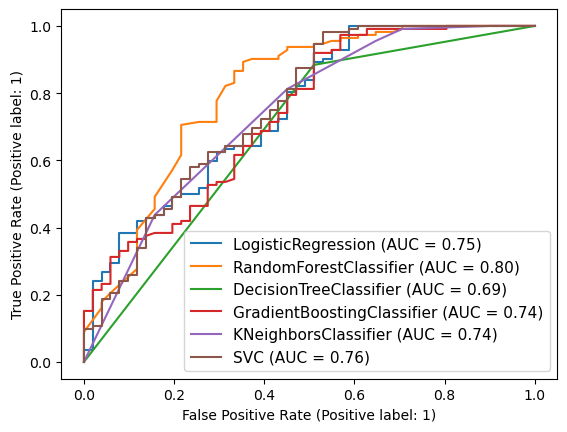

In [104]:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()


#### According to Accuracy Score and CV mean Logistic regression is our Best fitted Model.But, as we move on to ROC-AUC curve, it shows that Random Forest is best model to predict.

### HYPERPARAMETER TUNING IN RANDOM FOREST USING GRID SEARCH CV

In [105]:
from sklearn.model_selection import GridSearchCV
from pprint import pprint
pprint(rfc.get_params())


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [106]:
param = {
    'bootstrap':[True],
    'n_estimators':(100,200,300),
    'n_jobs':[-1],
}


In [107]:
grid = GridSearchCV(RandomForestClassifier()
                    ,param_grid=param,cv=5)
grid.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'n_estimators': (100, 200, 300),
                         'n_jobs': [-1]})

In [108]:
best_param=grid.best_params_
best_param

{'bootstrap': True, 'n_estimators': 300, 'n_jobs': -1}

In [109]:
rfc_tuned=RandomForestClassifier(n_estimators=200,max_depth=2,n_jobs=-1)
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, n_jobs=-1)

In [110]:
y_pred_rfc = rfc_tuned.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print('TRAINING SCORE : ', rfc_tuned.score(x_train,y_train))
print('TESTING SCORE : ', rfc_tuned.score(x_test,y_test))
print('ACCURACY :' , acc)
print('*****************************')
print(classification_report(y_test,y_pred_rfc))

TRAINING SCORE :  0.8138424821002387
TESTING SCORE :  0.8159509202453987
ACCURACY : 0.8098159509202454
*****************************
              precision    recall  f1-score   support

           0       1.00      0.41      0.58        51
           1       0.79      1.00      0.88       112

    accuracy                           0.82       163
   macro avg       0.89      0.71      0.73       163
weighted avg       0.85      0.82      0.79       163



## we have achive better  accuracy , training score with the help of hyper parameter tuning

## Efficiency Achieved

Improved Testing Score by 1%

Improved Training Score which might be overfitted on previous model.

Increased Accuracy of model.

Improved F1- score.

## Model Saving

In [112]:
import joblib
joblib.dump(rfc_tuned,'Loan_Application_Status.pkl')

['Loan_Application_Status.pkl']